Compare between LDA and PCA use KNeighborsClassifier and logistic regression on Mnist Data


In [36]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [4]:
# Step 1: Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)  # Convert target to integer

In [6]:
# Step 2: Preprocess data (normalize and split)
X = X / 255.0  # Normalize pixel values to [0,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 3: Apply LDA (Maximum C-1 components → 9 for 10 classes)
lda = LinearDiscriminantAnalysis(n_components=9)#cannot use number of components large then 9 depend on eqution c-1 where c is a number of classes
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

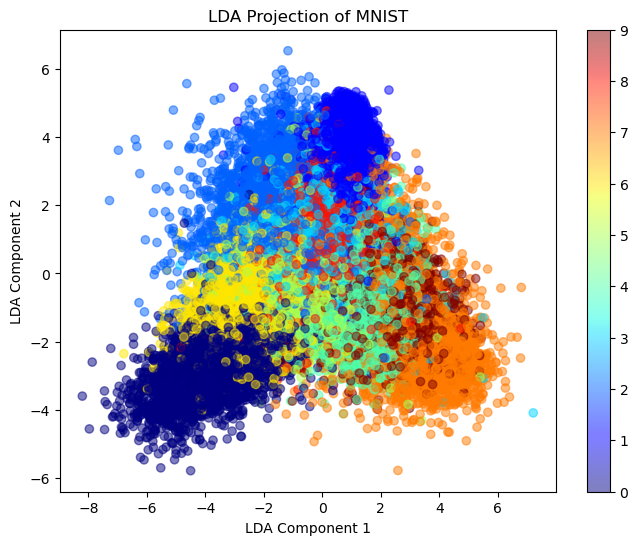

In [59]:
# Step 4: Visualize in 2D using the first two LDA components
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap="jet", alpha=0.5)
plt.colorbar(scatter)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of MNIST")
plt.show()

In [12]:
# Step 5: Classification with KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)
y_pred = knn.predict(X_test_lda)


In [14]:
# Step 6: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy using LDA + KNN: {accuracy:.4f}")


Classification Accuracy using LDA + KNN: 0.9161


In [24]:
# Step 7: Train Logistic Regression on LDA-transformed data
logistic = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic.fit(X_train_lda, y_train)

LogisticRegression(max_iter=1000)

In [26]:
# Step 8: Predict and evaluate accuracy
y_pred = logistic.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy using LDA + Logistic Regression: {accuracy:.4f}")

Classification Accuracy using LDA + Logistic Regression: 0.8836


In [30]:
# Step 9: Train Random Forest on LDA-transformed data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_lda, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Step 10: Predict and evaluate accuracy
y_pred = rf.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy using LDA + Random Forest: {accuracy:.4f}")

Classification Accuracy using LDA + Random Forest: 0.9111


In [42]:
# Step 11: Train SVM on LDA-transformed data
svm = SVC(kernel='rbf', C=1.0, random_state=42)  # rbf SVM
svm.fit(X_train_lda, y_train)

SVC(random_state=42)

In [44]:
# Step 12: Predict and evaluate accuracy
y_pred = svm.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy using LDA + SVM: {accuracy:.4f}")

Classification Accuracy using LDA + SVM: 0.9149


Now we use PCA

In [47]:
# Step 1: Apply PCA 
lda = PCA(n_components=154)
X_train_pca = lda.fit_transform(X_train, y_train)
X_test_pca = lda.transform(X_test)

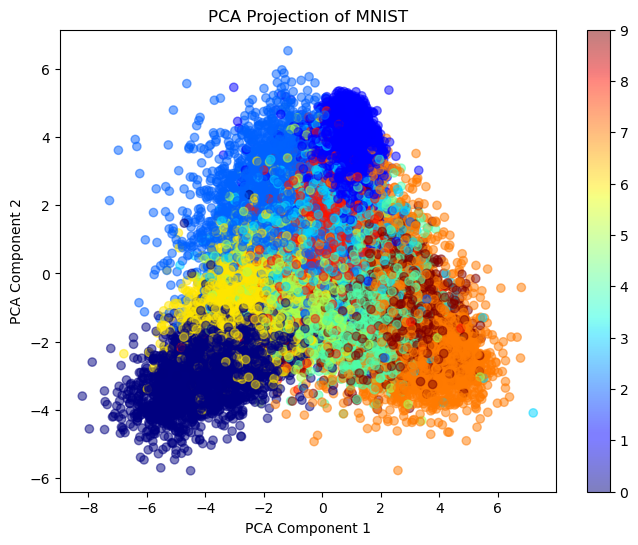

In [61]:
# Step 2: Visualize in 2D using the first two PCA components
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap="jet", alpha=0.5)
plt.colorbar(scatter)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of MNIST")
plt.show()

In [63]:
# Step 3: Classification with KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

In [67]:
# Step 4: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy using PCA + KNN: {accuracy:.4f}")

Classification Accuracy using PCA + KNN: 0.9724


In [69]:
# Step 5: Train Logistic Regression on PCA-transformed data
logistic = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000)

In [75]:
# Step 6: Predict and evaluate accuracy
y_pred = logistic.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy using PCA + Logistic Regression: {accuracy:.4f}")

Classification Accuracy using PCA + Logistic Regression: 0.9195


In [77]:
# Step 7: Train Random Forest on PCA-transformed data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Step 8: Predict and evaluate accuracy
y_pred = rf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy using PCA + Random Forest: {accuracy:.4f}")

Classification Accuracy using PCA + Random Forest: 0.9473


In [83]:
# Step 9: Train SVM on LDA-transformed data
svm = SVC(kernel='rbf', C=1.0, random_state=42)  # rbf SVM
svm.fit(X_train_pca, y_train)

SVC(random_state=42)

In [85]:
# Step 10: Predict and evaluate accuracy
y_pred = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy using LDA + SVM: {accuracy:.4f}")

Classification Accuracy using LDA + SVM: 0.9802
